# Import & Installation of packages and libraries used

In [3]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 2 Reading the Data

# Historical Series of Fuel and LPG Prices

Analysis by Luis Jorge - [LinkedIn](https://linkedin.com/in/luis-felipe-jorge/)


"*In compliance with the provisions of the Petroleum Law (Law No. 9478/1997, Article 8), the ANP monitors the prices charged by resellers of automotive fuels and liquefied petroleum gas bottled in 13-kilogram cylinders (LPG P13), through a weekly price survey conducted by a contracted company.*"

[National Agency of Petroleum, Natural Gas and Biofuels](https://www.gov.br/anp/pt-br)

[Historical Series](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)

[Metadata](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/metadados-serie-historica-precos-combustiveis-1.pdf)


`df.parquet.gzip` compiles all partitions of the series from the second half of 2019 to the second half of 2023.

It is available in the repository of this project. If you want to understand how the file was assembled, please consult the file acesso-dados-gov.ipynb.

[GitHub Repository](https://github.com/LuisFelipeJorge/Estudos-de-Caso-e-Projetos-Pessoais-/tree/main/Serie-e-precos-de-combustiveis-2023)


In [6]:
df_anp_ca = pd.read_parquet('df.parquet.gzip')

In [7]:
df_anp_ca.head()

,Regiao_Sigla,Estado_Sigla,Municipio,Revenda,CNPJ_da_Revenda,Nome_da_Rua,Numero_Rua,Complemento,Bairro,Cep,Produto,Data_da_Coleta,Valor_de_Venda,Valor_de_Compra,Unidade_de_Medida,Bandeira
0,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GASOLINA,01/07/2019,4.259,NaN,R$ / litro,BRANCA
1,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,ETANOL,01/07/2019,4.099,NaN,R$ / litro,BRANCA
2,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,01/07/2019,3.449,NaN,R$ / mÂ³,BRANCA
3,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,GASOLINA,01/07/2019,4.690,NaN,R$ / litro,BRANCA
4,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,ETANOL,01/07/2019,3.490,NaN,R$ / litro,BRANCA


## 2.1 Data Processing

In [8]:
df_anp_ca_cp = df_anp_ca.copy()

In [9]:
df_anp_ca_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845638 entries, 0 to 3845637
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Regiao_Sigla       object 
 1   Estado_Sigla       object 
 2   Municipio          object 
 3   Revenda            object 
 4   CNPJ_da_Revenda    object 
 5   Nome_da_Rua        object 
 6   Numero_Rua         object 
 7   Complemento        object 
 8   Bairro             object 
 9   Cep                object 
 10  Produto            object 
 11  Data_da_Coleta     object 
 12  Valor_de_Venda     float64
 13  Valor_de_Compra    float64
 14  Unidade_de_Medida  object 
 15  Bandeira           object 
dtypes: float64(2), object(14)
memory usage: 469.4+ MB




```
Regiao_Sigla: Region_Acronym
Estado_Sigla: State_Acronym
Municipio: Municipality
Revenda: Resale
CNPJ_da_Revenda: Resale_CNPJ
Nome_da_Rua: Street_Name
Numero_Rua: Street_Number
Complemento: Complement
Bairro: Neighborhood
Cep: Zip_Code
Produto: Product
Data_da_Coleta: Collection_Date
Valor_de_Venda: Selling_Price
Valor_de_Compra: Purchase_Price
Unidade_de_Medida: Unit_of_Measure
Bandeira: Brand
```

CNPJ stands for "Cadastro Nacional da Pessoa Jurídica", which is a unique identifier for Brazilian companies.



Evaluating the proportion of null values

In [10]:
df_anp_ca_cp.isnull().sum()

Regiao_Sigla               0
Estado_Sigla               0
Municipio                  0
Revenda                    0
CNPJ_da_Revenda            0
Nome_da_Rua                0
Numero_Rua              1707
Complemento          2959992
Bairro                 10321
Cep                        0
Produto                    0
Data_da_Coleta             0
Valor_de_Venda             0
Valor_de_Compra      3498896
Unidade_de_Medida          0
Bandeira                   0
dtype: int64

Adjusting date values and creating references for Years and Months.

In [11]:
df_anp_ca_cp['Data_da_Coleta'] = pd.to_datetime(df_anp_ca_cp['Data_da_Coleta'], format="%d/%m/%Y")

In [12]:
df_anp_ca_cp['Ano_da_Coleta'] = df_anp_ca_cp['Data_da_Coleta'].dt.strftime('%Y')
df_anp_ca_cp['Mes_da_Coleta'] = df_anp_ca_cp['Data_da_Coleta'].dt.strftime('%m')

Viewing marking of measurement units and fuel types.

In [13]:
print(df_anp_ca_cp['Produto'].unique())
print(df_anp_ca_cp['Unidade_de_Medida'].unique())

['GASOLINA' 'ETANOL' 'GNV' 'DIESEL' 'DIESEL S10' 'GASOLINA ADITIVADA']
['R$ / litro' 'R$ / mÂ³' 'R$ / m³']


We can see that there are records with errors in the measurement unit, reais (Brazilian currency) per cubic meter. Let's correct them.

In [14]:
# Identifique os valores a serem corrigidos na coluna 'Unidade_de_Medida'
valor_antigo = 'R$ / mÂ³'
valor_novo = 'R$ / m³'
df_anp_ca_cp.loc[df_anp_ca_cp['Unidade_de_Medida'] == valor_antigo, 'Unidade_de_Medida'] = valor_novo
print(df_anp_ca_cp['Unidade_de_Medida'].unique())

['R$ / litro' 'R$ / m³']


# 3 Objectives

Analyze and understand the behavior of fuel prices over the past 5 years.
Answer the following questions in different scopes of analysis.
1. **Temporal Analysis:**
   - How have fuel and LPG prices varied over time?
   - Are there seasonalities in prices?
   - What were the periods of greatest price volatility?
   - Is there a trend of price increase or decrease over the years?
   - How do prices behave in different regions and states of Brazil over time?
2. **Geographical Analysis:**
   - How do prices vary between different regions and states of Brazil?
   - Are there significant differences in prices between municipalities?
   - What is the spatial distribution of fuel and CNG prices?
3. **Correlation Analysis:**
   - Is there a correlation between the prices of different types of fuels?
   - Are CNG prices correlated with automotive fuel prices?
   - Is there any correlation between fuel prices and external factors, such as the price of oil in the international market?
4. **Price Analysis by Brand:**
   - Do unbranded stations offer more competitive prices compared to branded stations?
   - Is there a difference in prices between different brands?
   - What is the market share of different brands in fuel and CNG prices?

# 4 Analysis

## 4.1 Evaluating the historical evolution of the average fuel prices nationwide

In [15]:

def plot_prices_series(df, groupby_cols=['Ano_da_Coleta', 'Mes_da_Coleta', 'Produto'], aggregate_col='Valor_de_Venda', aggregation_func='mean', products=None, figsize=(15, 6),
                xlabel='', ylabel='', title=''):
    """
    Plots an aggregated time series from a DataFrame.

    Parameters:
    - df: Input DataFrame.
    - groupby_cols: List of columns to group by in the groupby method.
    - aggregate_col: Column to be aggregated, at least one date reference and the products.
    - aggregation_func: Aggregation function (e.g., 'mean', 'max', 'min').
    - products: List of desired products for filtering.
    - figsize: Tuple containing width and height of the plot.
    - xlabel: Title of the horizontal axis.
    - ylabel: Title of the vertical axis.
    - title: General title of the visualization.

    Returns:
    - The created plot.
    """
    # Performs the groupby operation and applies the aggregation function
    df_grouped = df.groupby(groupby_cols)[aggregate_col].agg(aggregation_func).reset_index()

    # Filters the DataFrame by desired products
    if products:
        filtered_df = df_grouped[df_grouped['Produto'].isin(products)]
    else:
        filtered_df = df_grouped

    # Adjusts the dimensions of the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Creates a plot for each product
    for product in filtered_df['Produto'].unique():
        subset = filtered_df[filtered_df['Produto'] == product]
        ax.plot(subset[groupby_cols[0]].astype(str) + '-' +
                subset[groupby_cols[1]].astype(str),
                subset[aggregate_col], label=product)

    # Plot settings
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc='upper left', fontsize=9)# , bbox_to_anchor=(1, 1))  # Positions the legend outside the plot
    ax.tick_params(axis='x', rotation=45)  # Rotates the x-axis labels for better readability
    # plt.grid(True)
    # Displays the plot
    plt.tight_layout()  # Adjusts the layout to avoid cutting labels
    plt.show()


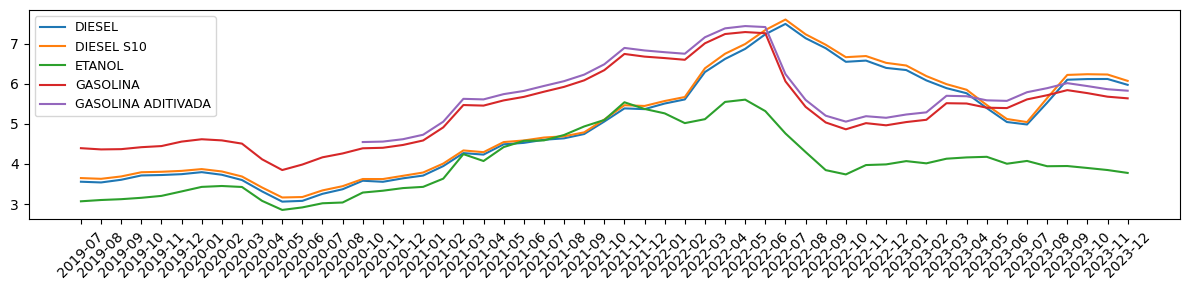

In [16]:
plot_prices_series(
    df_anp_ca_cp,
    ['Ano_da_Coleta', 'Mes_da_Coleta', 'Produto'],
    'Valor_de_Venda', 'mean',
    products=['DIESEL', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA'],
    figsize=(12, 3),
    xlabel='', ylabel='',
    title=''
  )

In [17]:
groupby_cols = ['Produto']
aggregate_col = 'Valor_de_Venda'
products=['DIESEL', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA']

# Perform the groupby operation and apply the aggregation function
df_grouped = df_anp_ca_cp.groupby(groupby_cols)\
.agg(min=(aggregate_col, 'min'), max=(aggregate_col, 'max'))\
.reset_index()

# Filter the DataFrame by desired products
if products:
    df_filtered = df_grouped[df_grouped['Produto'].isin(products)]
else:
    df_filtered = df_grouped

# Calculate the difference between max and min using .loc[]
df_filtered = df_filtered.assign(delta=df_filtered['max'] - df_filtered['min'])
df_filtered = df_filtered.assign(delta_relativo=round(df_filtered['delta']/df_filtered['min'], 2))

df_filtered

,Produto,min,max,delta,delta_relativo
0,DIESEL,2.453,8.999,6.546,2.67
1,DIESEL S10,2.465,9.650,7.185,2.91
2,ETANOL,1.799,7.980,6.181,3.44
3,GASOLINA,2.870,8.990,6.120,2.13
4,GASOLINA ADITIVADA,3.457,9.790,6.333,1.83


Highlighting the prices of Diesel and Gasoline, which showed the highest prices.
The peak occurs in the second half of 2022, followed by a sharp reduction, which did not return to the initial levels of 2019.

Ethanol was the type that showed the highest relative variation when compared to other products, rising more than 3 times its minimum value in the historical series.

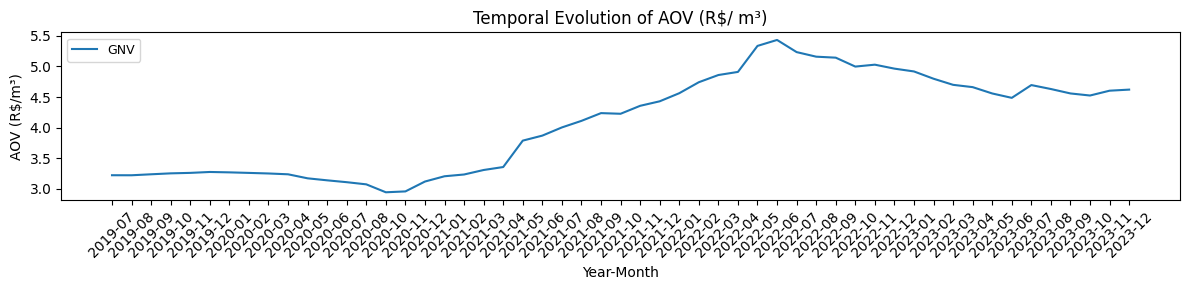

In [19]:
plot_prices_series(
    df_anp_ca_cp,
    ['Ano_da_Coleta', 'Mes_da_Coleta', 'Produto'],
    'Valor_de_Venda', 'mean',
    products=['GNV'],
    figsize=(12, 3),
    xlabel='Year-Month', ylabel='AOV (R$/m³)',
    title='Temporal Evolution of AOV (R$/ m³)'
  )

In [21]:
groupby_cols = ['Produto']
aggregate_col = 'Valor_de_Venda'
products=['GNV']

# Perform the groupby operation and apply the aggregation function
df_grouped = df_anp_ca_cp.groupby(groupby_cols)\
.agg(min=(aggregate_col, 'min'), max=(aggregate_col, 'max'))\
.reset_index()

# Filter the DataFrame by desired products
if products:
    df_filtered = df_grouped[df_grouped['Produto'].isin(products)]
else:
    df_filtered = df_grouped

# Calculate the difference between max and min using .loc[]
df_filtered = df_filtered.assign(delta=df_filtered['max'] - df_filtered['min'])
df_filtered = df_filtered.assign(relative_delta=round(df_filtered['delta']/df_filtered['min'], 2))

df_filtered

,Produto,min,max,delta,relative_delta
5,GNV,2.0,7.99,5.99,3.0


CNG, also derived from petroleum, is subject to the same influences as the others. It shows the same upward trend between 2020 and 2022, followed by a decline. With significant relative variation, being the highest among petroleum-based products.

## 4.2 Comparing with crude oil price and dollar exchange rate series


| Preço Barril de Petróleo (US$)             | Dólar (USD)/(BRL)               |
| ---------------------- | ---------------------- |
| 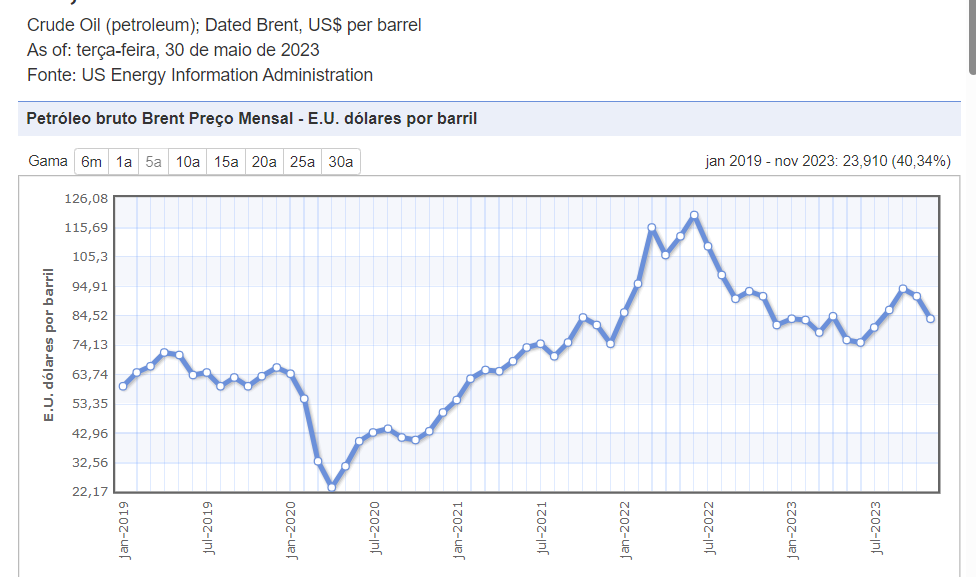 | 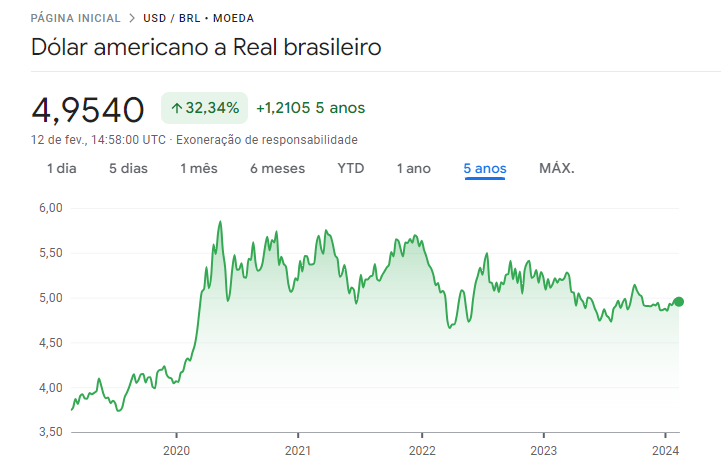 |
|[indexmundi.com](https://www.indexmundi.com/pt/pre%E7os-de-mercado/?mercadoria=petr%C3%B3leo-bruto-brent&meses=60) | [Google Finanças](https://www.google.com/finance/quote/USD-BRL?sa=X&ved=2ahUKEwjW1YPF_KWEAxW1pJUCHaWSAsEQmY0JegQIDhAo&window=5Y)|


One can notice a significant trend of growth in the overall price of all types of fuels throughout the years 2020 and 2021.
When analyzing the price curves of crude oil and the value of the Dollar compared to the Real, in the same period, we can observe a repetition of the behavior.

It's interesting to note that, to some extent, the fuel prices of all products follow the curve of the crude oil barrel value. Especially the repetition of peaks and valleys in close periods can be noticed.

In addition to the variations in the price of the barrel, it is possible to compare it with the variations of the dollar, which has seen a significant increase since the beginning of 2020, changing the level of historical prices, which fluctuated around R$ 4.00 and began to vary around R$ 5.00 since then. In recent months, it still fluctuates close to R$ 5.00.

This significant association is directly linked to the **Petrobras pricing policy** that adjusts fuel prices in Brazil according to the quotations practiced in the international market. The quotations are in dollars, so the variation of the American currency also affects the price of fuels - See more at [brazilian.report 2023](https://brazilian.report/newsletters/brazil-daily/2023/05/16/petrobras-pricing-fiscal-framework-bolsonaro/)


Let's try to quantify the influence of these 2 parameters in determining the price of fuels in the national territory. We will evaluate the weight of the correlation between the two curves.


In [28]:
df_petroleum = pd.read_excel('/content/petróleo-bruto-brent-60.xlsx') # file available at indexmundi
# Dictionary for translating abbreviated months in Portuguese to English
months_abbr_pt_to_en = {
    'jan.': 'Jan',
    'fev.': 'Feb',
    'mar.': 'Mar',
    'abr.': 'Apr',
    'mai.': 'May',
    'jun.': 'Jun',
    'jul.': 'Jul',
    'ago.': 'Aug',
    'set.': 'Sep',
    'out.': 'Oct',
    'nov.': 'Nov',
    'dez.': 'Dec'
}

# Function to replace abbreviated months in Portuguese with their English equivalents
def translate_month(abbreviated_month):
    return months_abbr_pt_to_en[abbreviated_month]

# Apply translation to the values in the 'date' column
df_petroleum['Ano'] = df_petroleum['Mês'].apply(lambda x: x.split('/')[1])
df_petroleum['Mês'] = df_petroleum['Mês'].apply(lambda x: x.split('/')[0]).apply(translate_month)
df_petroleum['Ano_Mes'] = df_petroleum['Mês']+'/'+df_petroleum['Ano']
# Convert the 'date' column to datetime
df_petroleum['Data'] = pd.to_datetime(df_petroleum['Ano_Mes'], format='%b/%y')

df_petroleum['Ano'] = df_petroleum['Data'].dt.strftime('%Y')
df_petroleum['Mes'] = df_petroleum['Data'].dt.strftime('%m')
df_petroleum.head()


,Mês,Preço,Taxa de variação,Ano,Ano_Mes,Data,Mes
0,Jan,59.27,-,2019,Jan/19,2019-01-01,01
1,Feb,64.13,0.082,2019,Feb/19,2019-02-01,02
2,Mar,66.41,0.0356,2019,Mar/19,2019-03-01,03
3,Apr,71.20,0.0721,2019,Apr/19,2019-04-01,04
4,May,70.53,-0.0094,2019,May/19,2019-05-01,05


Fonte [indexmundi.com](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.indexmundi.com%2Fpt%2Fpre%25E7os-de-mercado%2F%3Fmercadoria%3Dpetr%25C3%25B3leo-bruto-brent%26meses%3D60)


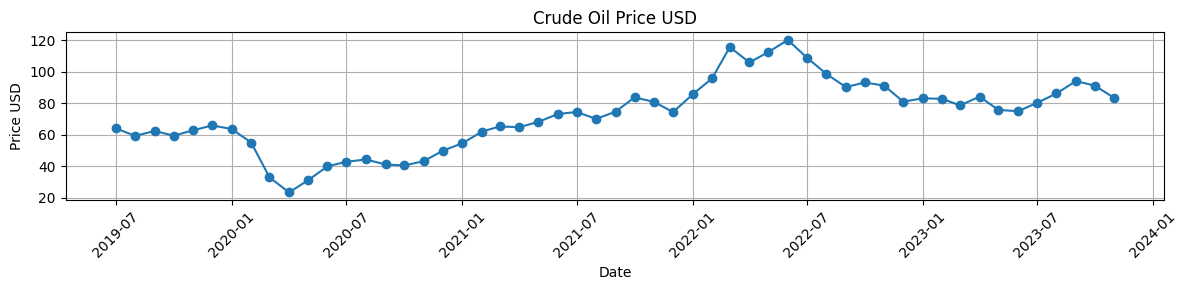

In [29]:
# applying the same sample cut as the price research
price_cut = df_petroleum[(df_petroleum['Data'] > '2019-06-01') & (df_petroleum['Data'] < '2024-01-01')]
plt.figure(figsize=(12, 3))
plt.plot(price_cut['Data'], price_cut['Preço'], marker='o', linestyle='-')
plt.title('Crude Oil Price USD')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()


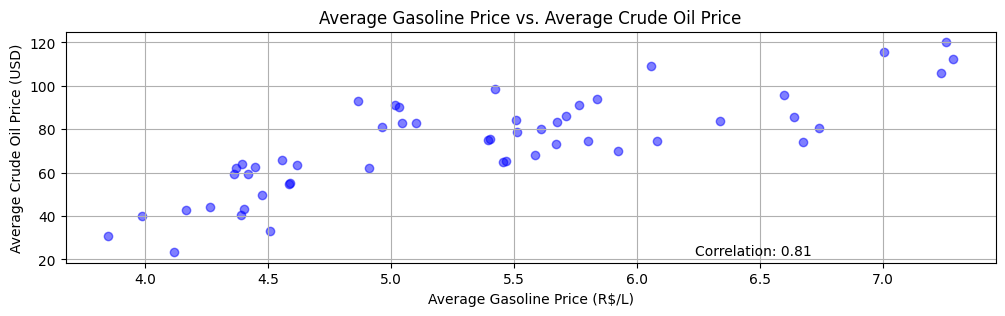

In [31]:
# Bringing the average value grouped by year-month and fuel type
df_grouped = df_anp_ca_cp.groupby(['Ano_da_Coleta', 'Mes_da_Coleta', 'Produto'])\
    .agg(mean=('Valor_de_Venda', 'mean'))\
    .reset_index()

# Selecting the gasoline time series
df_gasoline = df_grouped[
    (df_grouped['Produto']=='GASOLINA')
]

df_merge = df_petroleum.merge(
    df_gasoline,
    left_on=['Ano', 'Mes'],
    right_on=['Ano_da_Coleta', 'Mes_da_Coleta'],
    how='inner')[['Data', 'Preço','mean']]

df_merge.columns = ['Data', 'Average_oil_price','Average_gasoline_price']

gasoline_series = df_merge['Average_gasoline_price'].reset_index(drop=True)
oil_series = df_merge['Average_oil_price'].reset_index(drop=True)
corr = gasoline_series.corr(oil_series)
# Plot the scatter plot
plt.figure(figsize=(12, 3))
plt.scatter(gasoline_series, oil_series, color='blue', alpha=0.5)  # `alpha` sets the transparency of the points
plt.title('Average Gasoline Price vs. Average Crude Oil Price')
plt.xlabel('Average Gasoline Price (R$/L)')
plt.ylabel('Average Crude Oil Price (USD)')
plt.grid(True)

# Add the correlation value in the bottom right corner
plt.text(plt.xlim()[1] * 0.9, plt.ylim()[0]*1.1, f'Correlation: {corr:.2f}', horizontalalignment='right', verticalalignment='bottom')

plt.show()

The presence of an association is observed when analyzing the correlation value of 0.81 and the shape of the scatter plot. This indicates a dependency between the two curves, as the price of the oil barrel rises or falls, gasoline prices follow in a similar manner.

Although it is not a petroleum-derived fuel, the value curve of ethanol also follows the peaks and valleys of the derived products, within its own scale. Notably, there is a greater similarity with the average price curve of gasoline. Let's evaluate the correlation between the two series to quantify this:

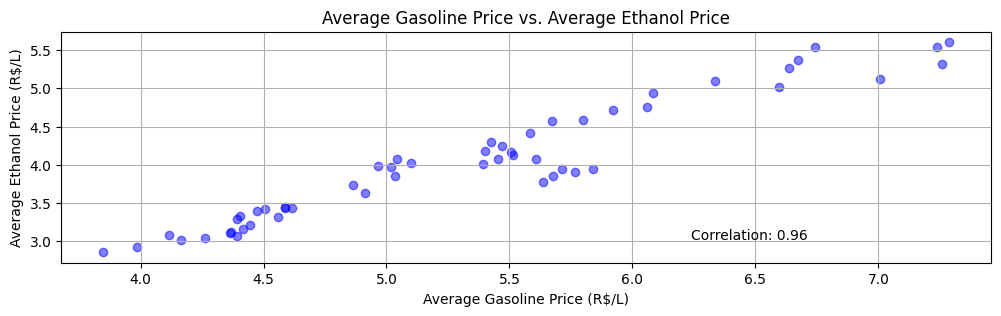

In [33]:
df_grouped =  df_anp_ca_cp.groupby(['Ano_da_Coleta', 'Mes_da_Coleta', 'Produto'])\
    .agg(media=('Valor_de_Venda', 'mean'))\
    .reset_index()

# Select the time series for gasoline and ethanol
gasoline_series = df_grouped[df_grouped['Produto']=='GASOLINA']['media'].reset_index(drop=True)
ethanol_series = df_grouped[df_grouped['Produto']=='ETANOL']['media'].reset_index(drop=True)

corr = gasoline_series.corr(ethanol_series)
# Plot the scatter plot
plt.figure(figsize=(12, 3))
plt.scatter(gasoline_series, ethanol_series, color='blue', alpha=0.5)  # `alpha` defines the transparency of the points
plt.title('Average Gasoline Price vs. Average Ethanol Price')
plt.xlabel('Average Gasoline Price (R$/L)')
plt.ylabel('Average Ethanol Price (R$/L)')
plt.grid(True)

# Add the correlation value at the bottom right corner
plt.text(plt.xlim()[1] * 0.9, plt.ylim()[0]*1.1, f'Correlation: {corr:.2f}', horizontalalignment='right', verticalalignment='bottom')

plt.show()

A strong linear correlation between the two data series is observed, very close to 1, also visible in the scatter plot.

This behavior is explained by the dynamics of fuel sales prices in the Brazilian market, which competes directly with gasoline, in a context where most cars in circulation are flex [UOL-2023](https://www.uol.com.br/carros/colunas/alta-roda/2023/03/08/brasil-atinge-a-marca-de-40-milhoes-de-carros-flex-fabricados-em-20-anos.htm).

Basically, when the price of gasoline rises, drivers switch to ethanol, which has a lower average price and consequently producers and gas station owners start charging more for the product. When gasoline prices fall, the same effect is seen in the opposite direction, gasoline becomes more competitive, and market agents lower the price of ethanol to match. This is why natural fuel shows such a strong dependence on the price of a barrel of oil as observed in derived products. It is an indirect association.

Demonstrating a complex interconnection in the fuel market.


## 4.3 Comparing Regions

### 4.3.1 Evaluating the Price Distribution Over Time Across Regions



To obtain the geometries of Brazilian states, access the collection available at [ibge.gov.br](https://www.ibge.gov.br/pt/inicio.html).

Path used:
Geociências > Organização do território > Malhas territoriais >  Malha Municipal > Brasil > Unidades da Federação.

Geosciences > Territory Organization > Territorial Meshes > Municipal Mesh > Brazil > Federative Units.

Where you can download a .zip file with the geometries.

On the platform, it is possible to download image maps, aerial and orbital images, maps, meshes, as well as contents from INDE, atlases, and Google Earth files, among others.

All files available here are public.

For this analysis, I used the 'Administrative Boundaries' layer, as I was interested in mapping the geometries of the Federative Units.

When extracting the zips, remember that shapefile layers need all the files together.

Source: https://www.geoaplicada.com/dados/limites-dos-estados-do-brasil/

In [36]:
br_uf = gpd.read_file('/content/BR_UF_22/BR_UF_2022.shp')
br_uf['NM_REGIAO'] = br_uf['NM_REGIAO'].str.replace('\n', '')
br_uf.head()

Output hidden; open in https://colab.research.google.com to view.

Product prices between states:

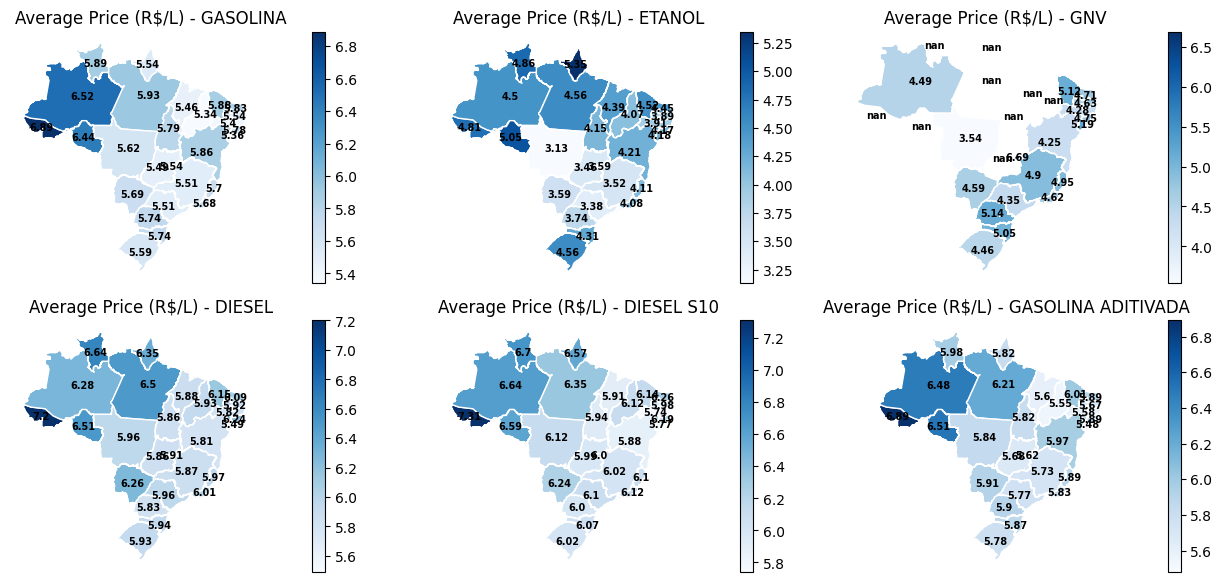

In [38]:
# Identify the different types of products present in the historical series
product_types = df_anp_ca_cp['Produto'].unique()

num_rows = 2
num_columns = 3

year = '2023'
month = '12'  # last reference

fig, axes = plt.subplots(num_rows, num_columns, figsize=(13, 6))
df_base = df_anp_ca_cp[(df_anp_ca_cp['Ano_da_Coleta'] == year) & (df_anp_ca_cp['Mes_da_Coleta'] == month)]

for i, product_type in enumerate(product_types):
    # Filter the DataFrame for the current product type
    df_aggregated_state = df_base[(df_base['Produto'] == product_type)]\
        .groupby(['Estado_Sigla'])['Valor_de_Venda']\
        .mean()\
        .reset_index()

    df_aggregated_state['Valor_de_Venda'] = df_aggregated_state['Valor_de_Venda'].round(2)

    # Merge the aggregated DataFrame with the geometry DataFrame
    df_stations_by_state = br_uf[['SIGLA_UF', 'geometry']]\
        .merge(df_aggregated_state,
               left_on='SIGLA_UF',
               right_on='Estado_Sigla',
               how='left')[['SIGLA_UF', 'geometry', 'Valor_de_Venda']]

    # Create an auxiliary column with the coordinates of the state centroids
    # to properly position the data labels on the map projection.
    df_stations_by_state['coords'] = df_stations_by_state['geometry'].apply(lambda x: x.representative_point().coords[:])
    df_stations_by_state['coords'] = [coords[0] for coords in df_stations_by_state['coords']]

    # Calculate the coordinates of the current subplot
    current_row = i // num_columns
    current_column = i % num_columns

    # Plot the heatmap in the current subplot
    df_stations_by_state.plot(
        column='Valor_de_Venda',
        cmap='Blues',
        legend=True,
        edgecolor='white',
        ax=axes[current_row, current_column]
    )

    # Add the values on the states
    coord_x = [tupla[0] for tupla in df_stations_by_state.coords]
    coord_y = [tupla[1] for tupla in df_stations_by_state.coords]
    for x, y, label in zip(
        coord_x, coord_y, df_stations_by_state['Valor_de_Venda']
    ):
        axes[current_row, current_column].text(x, y, label, fontsize=7, ha='center', va='center', weight='bold')

    # Set subplot title
    axes[current_row, current_column].set_title(f'Average Price (R$/L) - {product_type}')

    # Hide axes
    axes[current_row, current_column].axis('off')

plt.tight_layout()
plt.show()

Sampling gasoline and analyzing temporal behavior.

In [40]:
# last 6 months
temporal_ranges = [
    [('2023', '07'), ('2023', '08'), ('2023', '09')],
    [('2023', '10'), ('2023', '11'), ('2023', '12')]
]

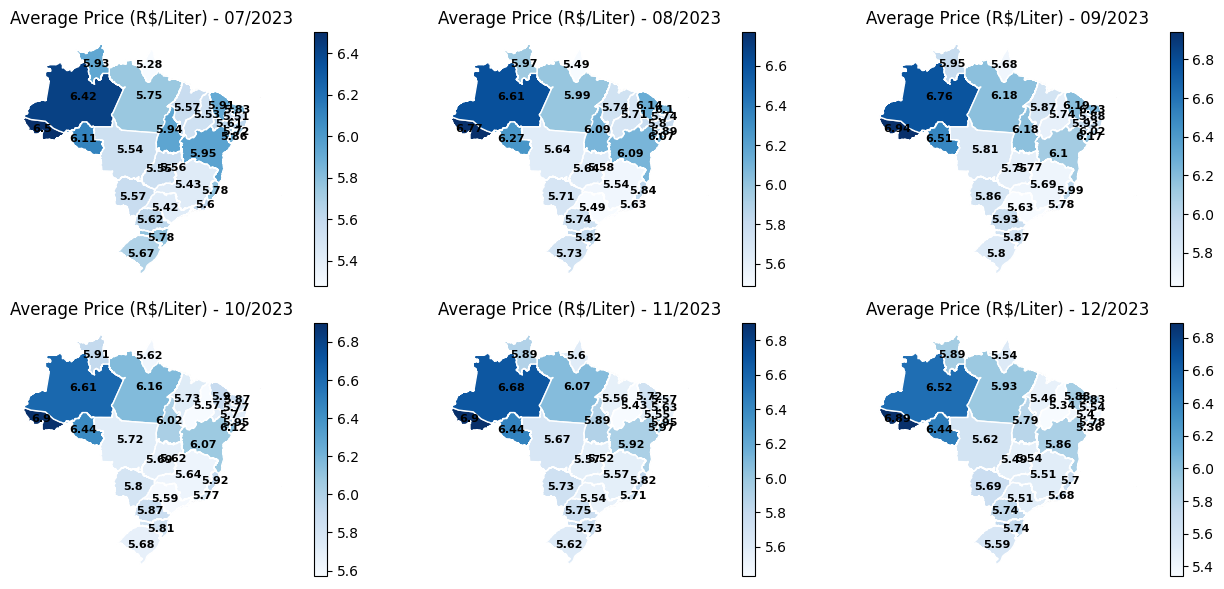

In [41]:
# Fuel
product = 'GASOLINA'
# Evolution of prices per state
fig, axes = plt.subplots(len(temporal_ranges), len(temporal_ranges[0]), figsize=(13,6))
axes = axes.reshape(len(temporal_ranges), len(temporal_ranges[0]))

for i, temporal_range in enumerate(temporal_ranges):
    for j, (year, month) in enumerate(temporal_range):
        # Filter the DataFrame for the current year and month
        df_aggregated_state = df_anp_ca_cp[
              (df_anp_ca_cp['Ano_da_Coleta'] == year) &
              (df_anp_ca_cp['Mes_da_Coleta'] == month) &
              (df_anp_ca_cp['Produto'] == 'GASOLINA')
            ]\
            .groupby(['Estado_Sigla'])['Valor_de_Venda']\
            .mean()\
            .reset_index()\
            # .rename(columns={'Valor_de_Venda': 'Valor_de_Venda'})
        df_aggregated_state['Valor_de_Venda'] = df_aggregated_state['Valor_de_Venda'].round(2)


        # Merge the aggregated DataFrame with the geometry DataFrame
        df_gasoline_by_state = br_uf[['SIGLA_UF', 'geometry']]\
            .merge(df_aggregated_state,
                   left_on='SIGLA_UF',
                   right_on='Estado_Sigla',
                   how='left')[['SIGLA_UF', 'geometry', 'Valor_de_Venda']]

        # Create an auxiliary column with the coordinates of the state centroids
        # to properly position the data labels on the map projection.
        df_gasoline_by_state['coords'] = df_gasoline_by_state['geometry'].apply(lambda x: x.representative_point().coords[:])
        df_gasoline_by_state['coords'] = [coords[0] for coords in df_gasoline_by_state['coords']]

        # Plot the heat map
        df_gasoline_by_state.plot(
            column='Valor_de_Venda',
            cmap='Blues',
            legend=True,
            edgecolor='white',
            ax=axes[i, j]
        )

        # Add the values on the states
        coord_x = [tupla[0] for tupla in df_gasoline_by_state.coords]
        coord_y = [tupla[1] for tupla in df_gasoline_by_state.coords]
        for x, y, label in zip(
            coord_x, coord_y, df_gasoline_by_state['Valor_de_Venda']
        ):
            axes[i, j].text(x, y, label, fontsize=8, ha='center', va='center', weight='bold')

        # Set subplot title
        axes[i, j].set_title(f'Average Price (R$/Liter) - {month}/{year}')

        # Hide axes
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 4.3.2 Analyzing the distribution of gas stations among regions


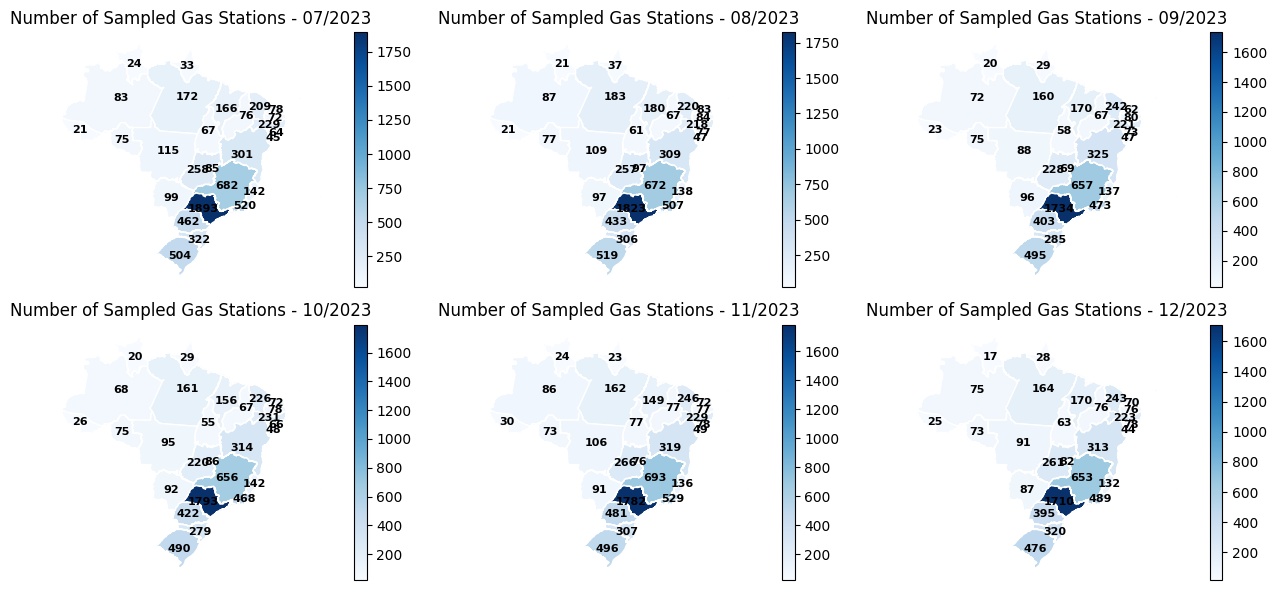

In [43]:
fig, axes = plt.subplots(len(temporal_ranges), len(temporal_ranges[0]), figsize=(13, 6))
axes = axes.reshape(len(temporal_ranges), len(temporal_ranges[0]))

for i, temporal_range in enumerate(temporal_ranges):
    for j, (year, month) in enumerate(temporal_range):
        # Filter the DataFrame for the current year and month
        df_aggregated_state = df_anp_ca_cp[
                (df_anp_ca_cp['Ano_da_Coleta'] == year) &
                (df_anp_ca_cp['Mes_da_Coleta'] == month) &
                (df_anp_ca_cp['Produto']=='GASOLINA')
              ]\
            .groupby(['Estado_Sigla'])['CNPJ_da_Revenda']\
            .nunique()\
            .reset_index()\
            .rename(columns={'CNPJ_da_Revenda': 'Qtd_Postos'})


        # Merge the aggregated DataFrame with the geometry DataFrame
        df_gas_stations_by_state = br_uf[['SIGLA_UF', 'geometry']]\
            .merge(df_aggregated_state,
                   left_on='SIGLA_UF',
                   right_on='Estado_Sigla',
                   how='left')[['SIGLA_UF', 'geometry', 'Qtd_Postos']]

        # Create an auxiliary column with the coordinates of the state centroids
        # to properly position the data labels on the map projection.
        df_gas_stations_by_state['coords'] = df_gas_stations_by_state['geometry'].apply(lambda x: x.representative_point().coords[:])
        df_gas_stations_by_state['coords'] = [coords[0] for coords in df_gas_stations_by_state['coords']]

        # Plot the heat map
        df_gas_stations_by_state.plot(
            column='Qtd_Postos',
            cmap='Blues',
            legend=True,
            edgecolor='white',
            ax=axes[i, j]
        )

        # Add the values on the states
        coord_x = [tupla[0] for tupla in df_gas_stations_by_state.coords]
        coord_y = [tupla[1] for tupla in df_gas_stations_by_state.coords]
        for x, y, label in zip(
            coord_x, coord_y, df_gas_stations_by_state['Qtd_Postos']
        ):
            axes[i, j].text(x, y, label, fontsize=8, ha='center', va='center', weight='bold')

        # Set subplot title
        axes[i, j].set_title(f'Number of Sampled Gas Stations - {month}/{year}')

        # Hide axes
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()



What we can see from the sequence of heatmaps:
- The South and Southeast regions are the areas with the cheapest gasoline, while the North and Northeast regions are the areas with the highest prices for the fuel.
- It can be assumed that the density of gas stations included in the price survey reflects part of the actual density of gas stations in each state, meaning that regions with a greater number of sampled stations should have a higher concentration of stations.

The first point can be explained as a consequence of the second when observing the following association: regions with a higher density of stations have the lowest price for selling fuel. This is probably due to having a lower fuel distribution cost. The presence of a high number of sellers has a price-regulating effect through competition among them, limiting the price that can be charged for the product.

In less concentrated regions, the opposite of this reasoning is observed, distant from distribution centers, which increases transportation costs, and, at the same time, regions with low density and therefore less affected by price competition regulation among stations.

### 4.3.3 Analyzing the distribution of prices among gas station brands


In [44]:
df_2023 = df_anp_ca_cp[(df_anp_ca_cp['Ano_da_Coleta'] == '2023')]
# Standardize records containing the term "VIBRA" in the name to "VIBRA"
df_2023.loc[df_2023['Bandeira'].str.contains('VIBRA'), 'Bandeira'] = 'VIBRA'


# Group the data by 'Bandeira' and calculate the count of distinct gas stations
brand_df = df_2023.groupby('Bandeira')['CNPJ_da_Revenda'].nunique().reset_index()

# Rename the column 'CNPJ_da_Revenda' to 'Qtd_Postos' (Number of Gas Stations)
brand_df = brand_df.rename(columns={'CNPJ_da_Revenda': 'Qtd_Postos'})

# Calculate the proportion of gas stations by brand
brand_df['Proportion'] = brand_df['Qtd_Postos'] / brand_df['Qtd_Postos'].sum()

# Sorting by the proportion of gas station presence - seeking the most representative ones
brand_df.sort_values(by='Qtd_Postos', ascending=False, inplace=True)
# Calculate cumulative sum of the proportion of gas stations
brand_df['Cumulative_Sum'] = brand_df['Proportion'].cumsum()
brand_df.head(5)


,Bandeira,Qtd_Postos,Proportion,Cumulative_Sum
5,BRANCA,3453,0.324988,0.324988
16,IPIRANGA,2427,0.228424,0.553412
45,VIBRA,2214,0.208376,0.761788
26,RAIZEN,1545,0.145412,0.907200
1,ALESAT,391,0.036800,0.944000


Analyzing the Top 4 Brands, we reach a coverage above 90% of the sampled gas stations.

Let's compare the price distribution among the states for each brand.

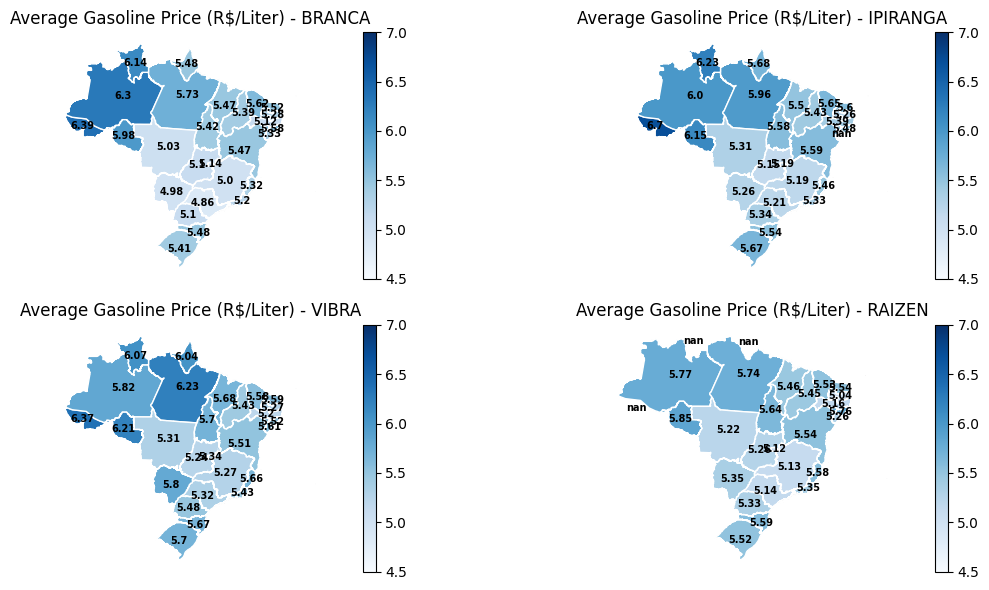

In [46]:
num_rows = 2
num_columns = 2

year = '2023'

# List of brands of interest
brands = ['BRANCA', 'IPIRANGA', 'VIBRA', 'RAIZEN']

fig, axes = plt.subplots(num_rows, num_columns, figsize=(13, 6))
df_base = df_anp_ca_cp[(df_anp_ca_cp['Ano_da_Coleta'] == year)]

for i, brand in enumerate(brands):
    # Filter the DataFrame for the current brand
    df_aggregated_state = df_base[(df_base['Bandeira'] == brand)]\
        .groupby(['Estado_Sigla'])['Valor_de_Venda']\
        .mean()\
        .reset_index()

    df_aggregated_state['Valor_de_Venda'] = df_aggregated_state['Valor_de_Venda'].round(2)

    # Merge the aggregated DataFrame with the geometry DataFrame
    df_stations_by_state = br_uf[['SIGLA_UF', 'geometry']]\
        .merge(df_aggregated_state,
               left_on='SIGLA_UF',
               right_on='Estado_Sigla',
               how='left')[['SIGLA_UF', 'geometry', 'Valor_de_Venda']]

    # Create an auxiliary column with the coordinates of the centroids of the states
    # to properly position the data labels on the map projection.
    df_stations_by_state['coords'] = df_stations_by_state['geometry'].apply(lambda x: x.representative_point().coords[:])
    df_stations_by_state['coords'] = [coords[0] for coords in df_stations_by_state['coords']]

    # Calculate the coordinates of the current subplot
    current_row = i // num_columns
    current_column = i % num_columns

    # Plot the heatmap on the current subplot
    df_stations_by_state.plot(
        column='Valor_de_Venda',
        cmap='Blues',
        legend=True,
        edgecolor='white',
        ax=axes[current_row, current_column],
        vmin=4.5, vmax=7
    )

    # Add the values on the states
    coord_x = [tupla[0] for tupla in df_stations_by_state.coords]
    coord_y = [tupla[1] for tupla in df_stations_by_state.coords]
    for x, y, label in zip(
        coord_x, coord_y, df_stations_by_state['Valor_de_Venda']
    ):
        axes[current_row, current_column].text(x, y, label, fontsize=7, ha='center', va='center', weight='bold')

    # Set the title of the subplot
    axes[current_row, current_column].set_title(f'Average Gasoline Price (R$/Liter) - {brand}')

    # Hide axes
    axes[current_row, current_column].axis('off')

plt.tight_layout()
plt.show()

In [47]:
# Group the data by 'Bandeira' and 'Produto' and calculate the average value
average_ticket_df = df_2023[df_2023['Bandeira'].isin(['BRANCA', 'IPIRANGA', 'VIBRA', 'RAIZEN'])]\
    .groupby(['Bandeira', 'Produto'])['Valor_de_Venda'].mean().reset_index()

# Use the pivot function to transform the values of the 'Produto' column into columns
average_ticket_pivot = average_ticket_df.pivot(index='Bandeira', columns='Produto', values='Valor_de_Venda').reset_index()

# Rename the columns for better visualization
average_ticket_pivot.columns.name = None

# Display the resulting DataFrame for the average value by product and brand
print("\nAverage value by product and brand:")
print(average_ticket_pivot)


Average value by product and brand:
   Bandeira    DIESEL  DIESEL S10    ETANOL  GASOLINA  GASOLINA ADITIVADA  \
0    BRANCA  5.668952    5.760063  3.904758  5.424713            5.536537   
1  IPIRANGA  5.819438    5.938325  4.012106  5.579286            5.766587   
2    RAIZEN  5.717227    5.821697  3.952492  5.523444            5.818168   
3     VIBRA  5.841499    5.947408  4.143104  5.613233            5.775437   

        GNV  
0  4.693958  
1  4.727360  
2  4.524530  
3  4.597483  


Non-branded gas stations, on average, had lower selling prices for fuels in the last year (2023). The difference in values becomes more evident in regions with a higher concentration of gas stations (SP, MG, RJ, and RS), where competition is fiercer.

The brand that exerted the highest average value across regions was VIBRA, formerly known as BR, responsible for selling Petrobras' distribution.

# 5 Project Insights Summary
----
1. Temporal Evolution of Fuel Prices:
  * Gasoline Trends: Across the years 2020 and 2021, there was a noticeable upward trend in fuel prices. Gasoline prices followed a similar pattern to crude oil prices and the exchange rate between the Dollar and the Real. The analysis revealed a strong correlation between gasoline and crude oil prices, with a correlation coefficient of 0.81.
  * Ethanol Prices: Despite not being a petroleum-derived fuel, ethanol prices exhibited peaks and troughs similar to petroleum products. Notably, ethanol prices closely followed gasoline price trends, indicating a strong correlation between the two.
2. Regional Comparisons:
  * Price Distribution Across States: Heatmaps illustrated that the Southern and Southeastern regions had the lowest gasoline prices, while the Northern and Northeastern regions had the highest. Regions with denser sampling of gas stations tended to have lower fuel prices, possibly due to increased competition among sellers.
  * Brand Influence: Analysis of the top four gas station brands revealed that VIBRA (formerly BR) had the highest average prices across regions.
3. Insights from Gas Station Brands:
  * Non-Branded Stations: Non-branded gas stations generally offered lower fuel prices, especially in regions with higher station concentration, indicating intense competition.
  * Brand Comparison: VIBRA, the brand associated with Petrobras' distribution, consistently exerted higher prices compared to other brands.

  
These findings provide valuable insights into the dynamics of fuel pricing, highlighting the impact of factors such as crude oil prices, exchange rates, regional competition, and brand influence. Understanding these dynamics can aid policymakers and industry stakeholders in making informed decisions and strategies within the fuel market.